## Edge_threshold 实验结果统计

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pickle
import numpy as np 

# 最优指标
root = 'record/edge_threshold_exp/data'
threshold = ['0', '0.2', '0.4', '0.6', '0.8']
dataset_list = ['cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
# dataset_list = ['texas']
df = pd.DataFrame(index=threshold, columns=dataset_list)
res_dic = {}

for dir in os.listdir(root):
    if dir not in res_dic:
        res_dic[dir] = {}
        
    for data_file in os.listdir(os.path.join(root, dir)):
        dataset_name = data_file.split('_')[0]
        if dataset_name not in res_dic[dir]:
            res_dic[dir][dataset_name] = []

        with open(os.path.join(root, dir, data_file), 'rb') as file:
            data = pickle.load(file)
            res_dic[dir][dataset_name].append(data['best_val_metric_list'])
            
for tau in threshold:
    for dataset in dataset_list:
        res_list = res_dic[tau][dataset]
        res_list = [np.max(r) for r in res_list]
        df[dataset][tau] = f'{np.mean(res_list):.4f}±{np.std(res_list):.3f}'

print(df)

          cornell         texas     wisconsin     chameleon      squirrel
0    0.8111±0.041  0.8444±0.028  0.8920±0.027  0.4897±0.009  0.3389±0.003
0.2  0.8278±0.021  0.8389±0.057  0.8840±0.023  0.4875±0.009  0.3462±0.000
0.4  0.8167±0.038  0.8444±0.022  0.8800±0.025  0.4927±0.016  0.3404±0.000
0.6  0.8500±0.052  0.8389±0.027  0.8600±0.022  0.4905±0.012  0.3529±0.000
0.8  0.8278±0.032  0.8722±0.045  0.8760±0.020  0.4853±0.011  0.3510±0.000


In [ ]:
df.to_csv('1.csv')

In [4]:
# 折线图
for tau in threshold:
    print(tau)
    for dataset in dataset_list:
        print(res_dic[tau][dataset])

0
[[0.5833333134651184, 0.694444477558136, 0.6111111044883728, 0.6388888955116272, 0.694444477558136, 0.8055555820465088, 0.7777777910232544, 0.7222222089767456, 0.7777777910232544, 0.7777777910232544], [0.694444477558136, 0.7222222089767456, 0.694444477558136, 0.8611111044883728, 0.8055555820465088, 0.8888888955116272, 0.8055555820465088, 0.8888888955116272, 0.8055555820465088, 0.8333333134651184], [0.75, 0.8611111044883728, 0.7777777910232544, 0.8055555820465088, 0.75, 0.8055555820465088, 0.8055555820465088, 0.8333333134651184, 0.8611111044883728, 0.7777777910232544], [0.5833333134651184, 0.8333333134651184, 0.694444477558136, 0.75, 0.6666666865348816, 0.75, 0.75, 0.75, 0.7777777910232544, 0.75], [0.6388888955116272, 0.7222222089767456, 0.8055555820465088, 0.8333333134651184, 0.694444477558136, 0.6388888955116272, 0.7222222089767456, 0.8055555820465088, 0.7777777910232544, 0.7222222089767456]]
0.2
[[0.5833333134651184, 0.7222222089767456, 0.7222222089767456, 0.75, 0.7222222089767456,

## Layer_loss_threshold 实验数据

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pickle
import numpy as np 

# 最优指标
root = 'record/layer_loss_exp/data'
threshold = ['0.5', '0.6', '0.7', '0.8', '0.9', '1']
dataset_list = ['cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
# dataset_list = ['texas']
df = pd.DataFrame(index=threshold, columns=dataset_list)
res_dic = {}

for dir in os.listdir(root):
    if dir not in res_dic:
        res_dic[dir] = {}
        
    for data_file in os.listdir(os.path.join(root, dir)):
        dataset_name = data_file.split('_')[0]
        if dataset_name not in res_dic[dir]:
            res_dic[dir][dataset_name] = []

        with open(os.path.join(root, dir, data_file), 'rb') as file:
            data = pickle.load(file)
            res_dic[dir][dataset_name].append(data['best_val_metric_list'])
            
for tau in threshold:
    for dataset in dataset_list:
        res_list = res_dic[tau][dataset]
        res_list = [np.max(r) for r in res_list]
        df[dataset][tau] = f'{np.mean(res_list):.4f}±{np.std(res_list):.3f}'

print(df)

          cornell         texas     wisconsin     chameleon      squirrel
0.5  0.7944±0.045  0.8500±0.038  0.8800±0.042  0.4848±0.007  0.3466±0.005
0.6  0.8056±0.039  0.8556±0.032  0.8800±0.042  0.4884±0.004  0.3409±0.003
0.7  0.7944±0.060  0.8722±0.022  0.8800±0.057  0.4818±0.011  0.3423±0.000
0.8  0.8111±0.021  0.8556±0.032  0.8800±0.057  0.4905±0.013  0.3471±0.000
0.9  0.7889±0.065  0.8444±0.038  0.8560±0.056  0.4782±0.012  0.3394±0.000
1    0.6944±0.050  0.7667±0.042  0.7520±0.047  0.3675±0.049  0.2687±0.014


## baseline

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pickle
import numpy as np 

# 最优指标
root = 'record/'
models = ['GCN', 'GIN', 'mlp']
dataset_list = ['cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
# dataset_list = ['texas']
df = pd.DataFrame(index=models, columns=dataset_list)
res_dic = {}

for model in models:
    pt = os.path.join(root, model)
    if model not in res_dic:
        res_dic[model] = {} 
            
    for data_file in os.listdir(pt):
        dataset_name = data_file.split('_')[0]
        if dataset_name not in res_dic[model]:
            res_dic[model][dataset_name] = []

        with open(os.path.join(pt, data_file), 'rb') as file:
            data = pickle.load(file)
            res_dic[model][dataset_name].append(data['best_val_metric_list'])
                
for model in models:
    for dataset in dataset_list:
        res_list = res_dic[model][dataset]
        res_list = [np.max(r) for r in res_list]
        df[dataset][model] = f'{np.mean(res_list):.4f}±{np.std(res_list):.3f}'

print(df)

          cornell         texas     wisconsin     chameleon      squirrel
GCN  0.6444±0.077  0.6833±0.072  0.6240±0.050  0.3837±0.025  0.2854±0.020
GIN  0.7000±0.054  0.6778±0.052  0.5800±0.018  0.3965±0.024  0.2979±0.019
mlp  0.8056±0.063  0.7722±0.067  0.8600±0.040  0.4532±0.023  0.3190±0.010


## Dynamic Logits Observation

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pickle
import numpy as np 
import torch 

# 最优指标
root = 'record/dynamic_logits/data'
# dataset_list = ['cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
dataset_list = ['texas']
out_list = []
for dataset in dataset_list:
    pt = os.path.join(root, dataset)
    for f in os.listdir(pt):
        with open(os.path.join(pt, f), 'rb') as file:
            data = pickle.load(file)
            out_list.append(data['out_list'])       
texas_0 = out_list[0]
texas_0 = torch.tensor(np.array([i.detach().cpu().numpy() for i in texas_0]))
texas_0 = torch.softmax(texas_0, dim=-1)
texas_0.size() # iteration n_layers n_nodes n_class

torch.Size([975, 4, 183, 5])

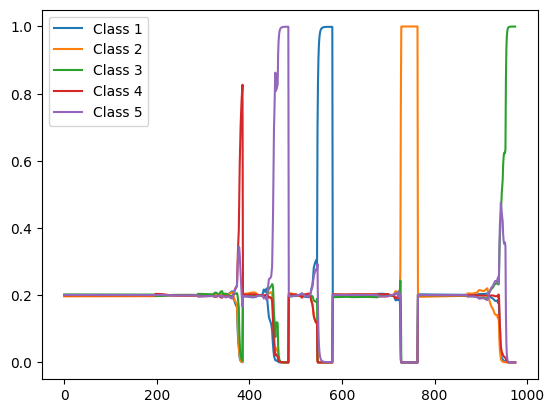

In [77]:
node_0 = texas_0[:, 0, 0]
import matplotlib.pyplot as plt 
for i in range(node_0.shape[1]):
    plt.plot(node_0[:, i], label=f'Class {i+1}')
plt.legend()

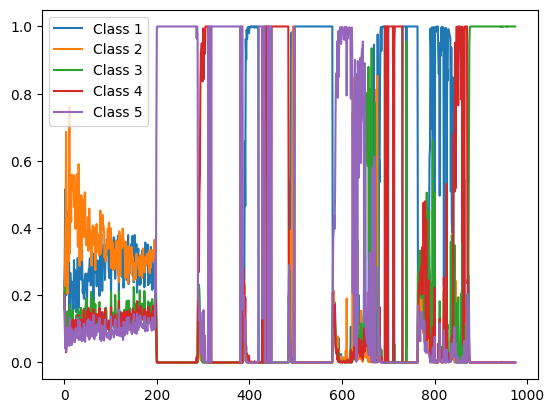

In [79]:
node_0 = texas_0[:, 1, 0]
import matplotlib.pyplot as plt 
for i in range(node_0.shape[1]):
    plt.plot(node_0[:, i], label=f'Class {i+1}')
plt.legend()

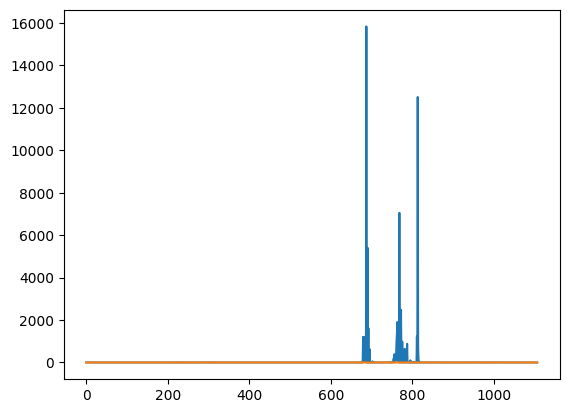

In [80]:
plt.plot(data['loss_list'])

In [82]:
np.max(data['loss_list'])

15831.6943359375

In [73]:
texas_0[:, 0, 0].size()

torch.Size([975, 5])

In [36]:
import torch 
for i in range(len(out_list)):
    for j in range(len(out_list[i])):
        for k in range(len(out_list[i][j])):
            out_list[i][j][k] = torch.softmax(out_list[i][j][k], dim=1)

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [39]:
torch.softmax(out_list[i][j][k], dim=1)

tensor([[0.1998, 0.1968, 0.2025, 0.1998, 0.2011],
        [0.2002, 0.1966, 0.2022, 0.1996, 0.2013],
        [0.2000, 0.1965, 0.2024, 0.1995, 0.2016],
        [0.2005, 0.1971, 0.2020, 0.1995, 0.2010],
        [0.2001, 0.1969, 0.2025, 0.1995, 0.2010],
        [0.1999, 0.1969, 0.2020, 0.2000, 0.2012],
        [0.2005, 0.1962, 0.2021, 0.1996, 0.2016],
        [0.2003, 0.1965, 0.2023, 0.1993, 0.2015],
        [0.1999, 0.1970, 0.2021, 0.2000, 0.2010],
        [0.2003, 0.1969, 0.2021, 0.1994, 0.2012],
        [0.1996, 0.1970, 0.2024, 0.1997, 0.2013],
        [0.1999, 0.1970, 0.2020, 0.1996, 0.2015],
        [0.2000, 0.1968, 0.2021, 0.1997, 0.2015],
        [0.2001, 0.1970, 0.2021, 0.1998, 0.2010],
        [0.2005, 0.1969, 0.2021, 0.1994, 0.2013],
        [0.2001, 0.1970, 0.2022, 0.1997, 0.2010],
        [0.2000, 0.1969, 0.2025, 0.1993, 0.2013],
        [0.1998, 0.1973, 0.2025, 0.1996, 0.2008],
        [0.1997, 0.1969, 0.2023, 0.2001, 0.2010],
        [0.2002, 0.1966, 0.2021, 0.1996, 0.2015],


## Decouple-exp

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pickle
import numpy as np 

# 最优指标
root = 'record/decouple_exp/data'
models = ['ourModel_s1', 'ourModel_s2', 'ourModel_s3', 'mlp']
dataset_list = ['cornell', 'texas', 'wisconsin', 'chameleon', 'squirrel']
# dataset_list = ['texas']
df = pd.DataFrame(index=models, columns=dataset_list)
res_dic = {}

for model in models:
    pt = os.path.join(root, model)
    if model not in res_dic:
        res_dic[model] = {} 
            
    for data_file in os.listdir(pt):

        dataset_name = data_file.split('_')[0]
        if dataset_name not in res_dic[model]:
            # print(dataset_name)
            res_dic[model][dataset_name] = []

        with open(os.path.join(pt, data_file), 'rb') as file:
            data = pickle.load(file)
            res_dic[model][dataset_name].append(data['best_val_metric_list'])
                
for model in models:
    for dataset in dataset_list:
        res_list = res_dic[model][dataset]
        res_list = [np.max(r) for r in res_list]
        df[dataset][model] = f'{np.mean(res_list):.4f}±{np.std(res_list):.3f}'

print(df)

                  cornell         texas     wisconsin     chameleon  \
ourModel_s1  0.8306±0.050  0.8556±0.032  0.8760±0.050  0.4813±0.019   
ourModel_s2  0.8389±0.048  0.7222±0.115  0.6200±0.188  0.4598±0.025   
ourModel_s3  0.8778±0.028  0.8722±0.048  0.8800±0.033  0.5011±0.016   
mlp          0.8500±0.042  0.8278±0.021  0.8240±0.046  0.4484±0.014   

                 squirrel  
ourModel_s1  0.3429±0.013  
ourModel_s2  0.3196±0.009  
ourModel_s3  0.3531±0.003  
mlp          0.3208±0.012  


In [9]:
with open('record/decouple_exp/data/ourModel_s1/texas_0.pickle', 'rb') as file:
    data = pickle.load(file)

In [16]:
data['state_record_list'][0]['train_index'].sum() / 183

tensor(0.1967)

In [7]:
for k in res_dic['ourModel'].keys():
    print(k)

cornell


cornell         texas     wisconsin     chameleon      squirrel
0.8111±0.021  0.8556±0.032  0.8800±0.057  0.4905±0.013  0.3471±0.000